Title: WIDS Palm Oil Plantation Prediction

Date : February  2019

Plan:

**First things First: snacks and chip checked, Coffee checked**

  1- Introduction
  
    - Data Field and Description
    
  2 -  Importing Libraries
    
  3 - Explore the dataset
    
    - Feature exploration and Cleaning
    
  4- Training using Convolution Neural Networks


# Introduction: 

This competiton touches on one of the major agricultural problems facing many Palm oil producing countries-  Deforestaion, biodiversity loss and Increase Green house emission.

Palm oil (Elæis guineensis) is the main cooking ingredient in the most tropical parts of the world like  Brazil, South East Asia and tropical part of Africa(particularly in Cameroon where i grew up). Extracted from the pulp of the fruit, this staple has so many uses and virtues. 

**To the Health:**

* Palm oil reduces cholestorol levels and some stusdies have found that palm oil can reduce the amount of bad LDL cholesterol in our body, keeping the hearts healthy and strong. Which brings us to the second virtue
* It slows the progression of Heart diseases
* Boosts Brain Health as it is jam-packed with a from of Vitamin E(tocotienol)  which has beneficial effects on brain health, skin and hair health too.
* Plam oil is an excellent source of the Vitamin A supplement -Beta-Carotene, whihc is important for maintaining good eye health, Also beneficial to pregnant women and their babies. ( Just a little anecdote: In my Country Cameroon, whenever an old women sees you wearing prescription eyeglasses, she will tell you "Come on!!! Take that thing off your eyes and consume more Palm oil". Happens to me all the time :') )
* Palm oil is high in beneficial antioxidant, which has been shown to reduce inflammation and Oxidative stress caused by free radicals.

**Additionally:**
 * It is also the cheapest vegetable oil in the world
 * Plam oil also produces palm kernel oil extracted from the endosperm which is mainly used in the cosmetics industry.  
 * Palm kernel waste (after the oil has beenextracted) is also used as animal feed and in co-firing in electricity generation.
 * it also has a natural preservative effect which extends the shelf life of food products That is why it is about half the package products sold in our grocery stores. From shampoo to detergents, to lipsticks, to bread, to cookies and even our Biodiesels, palm oil is present everywhere.
 
 **BUT BUT BUT.....** 
 * Plam oils cultivation is responsible for direct damage to flora and wildlife habitats due to forest conversion and the influx of palm oil workers increases pressure on wildlife through hunting .
 * Plam oils deforestation as a result of forest being destroyed, to keep up with the growing demands for palm oil, hence increasing greeenhouse gas emissions.
 * Palm oil production has major negative environmental consequences on soils (erosion potential on steep slopes) and water quality (pollution by pesticide run-off).
 * There has also been reports of Human rights violations by coorporations and companies that produce palm oil. Some of the issues incude, unsafe working conditions for the workers, Very low pay etc.
 
Despite the positive impacts and vitues of palm oil, its expansion has led to deforestation, increased carbon emissions, and biodiversity loss,.
 
# About the Challenge:

The challenge is to create a model that predicts the presence of oil palm plantations in satellite imagery. The datathon task is to train a model that takes as input a satellite image and outputs a prediction of how likely it is that the image contains an oil palm plantation. 

The dataset images are 3-meter spatial resolution, and each is labeled with whether an oil palm plantation appears in the image (0 for no plantation, 1 for any presence of a plantation).

Labeled training and test datasets are provided for model development.

# sOurce:
* https://news.mongabay.com/2016/04/palm-oil-cameroon-blessing-curse-small-scale-farmers-2/
* http://awsassets.panda.org/downloads/palmoildevelopmentcameroon_english.pdf
* https://www.excelvite.com/red-palm-oil-benefits-the-heart-brain-but-is-it-bad-for-the-environment/

**Data Fields and Description:**

**image_id** - an anonymous id unique to a given image.

**has_oilpalm** - the annotation or label for a given image, with 0 indicating no oil palm, and 1 indicating presence of oil palm plantations.

**score** - confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score, and indicates Figure Eight's confidence in the validity of the result. For more details on how these scores are calculated, visit this article. Please note that this is extra data that need not be incorporated in your model, but may be useful. In addition, stay tuned for a blogpost focused more deeply on the data annotation process and more!

# 1- Importing Libraries

In [85]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Loading and Reading data

In [86]:
# #Loading the images paths
img_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train')
img_test_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set')
img_holdout_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data\valid_set')

#Image paths (Amy)
# img_train_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\train_images')
# img_test_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\leaderboard_test_data')

In [87]:
# #oading the .csv file
data = pd.read_csv(r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\traininglabels (1).csv")
data.sample(5)

#Label path (Amy)
# data = pd.read_csv(r"C:\Users\Amy\KaggleProject\data\traininglabels.csv")
# data.sample(5)

,image_id,has_oilpalm,score
13886,img_093212018.jpg,0,1.0000
12469,img_072282018.jpg,0,0.8039
9216,img_025012018.jpg,0,1.0000
15138,img_111152018.jpg,0,1.0000
559,img_008352017.jpg,0,1.0000


# 3 - Data Preprocessing

In [88]:
data.describe()

,has_oilpalm,score
count,15244.000000,15244.000000
mean,0.061795,0.955769
std,0.240790,0.109367
min,0.000000,0.388700
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [89]:
data['has_oilpalm'].value_counts(normalize = True)

0    0.938205
1    0.061795
Name: has_oilpalm, dtype: float64

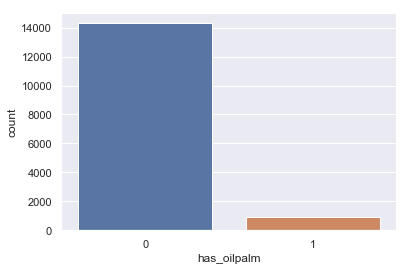

In [90]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'has_oilpalm', data = data)

In [91]:
data['score'].value_counts(normalize = True).head()

1.0000    0.834623
0.8000    0.001706
0.7992    0.001181
0.7981    0.001115
0.7976    0.000984
Name: score, dtype: float64

***************************************************************************************************************************

# Todo 1- Lets take a look at the different classes- 0 and 1

In [92]:
# We separate the classes 

label_1 = data[data['has_oilpalm']==1]
label_0 = data[data['has_oilpalm']==0]

In [93]:
# Plot the images in label 1
label_1.head()

,image_id,has_oilpalm,score
72,img_001092017.jpg,1,0.3944
75,img_001132017.jpg,1,1.0000
109,img_001712017.jpg,1,0.7543
129,img_002012017.jpg,1,1.0000
143,img_002232017.jpg,1,1.0000


In [94]:
label_1.shape

(942, 3)

In [95]:
label_0.shape

(14302, 3)

In [96]:
data.shape

(15244, 3)

To ease the image reading process we can create an additional column to the dataset with the global path of the images

In [97]:
label_1['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in label_1['image_id']]
label_0['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in label_0['image_id']]
label_1.head()

C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,image_id,has_oilpalm,score,image_path
72,img_001092017.jpg,1,0.3944,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
75,img_001132017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
109,img_001712017.jpg,1,0.7543,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
129,img_002012017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
143,img_002232017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...


In [98]:
# We plot some of the pictures in the label_1 just to have an idea of what a plantation with oilpalm look like

haspalm_images = np.random.choice(label_1['image_path'],5)
nopalm_images = np.random.choice(label_0['image_path'],5)
haspalm_images  


array(['C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_093602017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_092712018.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_069032017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_062392018.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_027612018.jpg'],
      dtype=object)

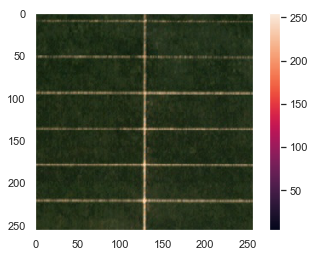

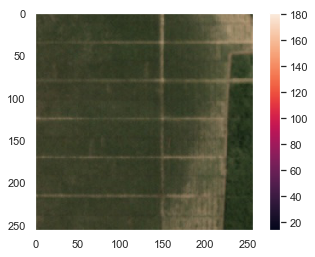

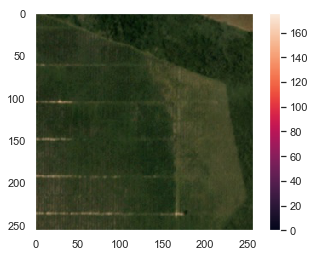

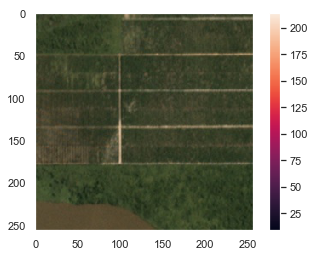

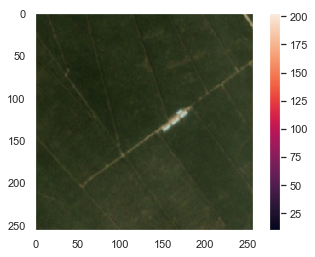

In [99]:
from PIL import Image

for image in haspalm_images:
    img  = Image.open(image)
    plt.imshow(img)
    plt.colorbar()
    plt.grid()== False
    plt.show()

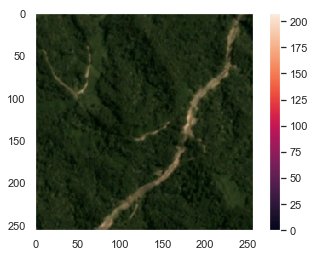

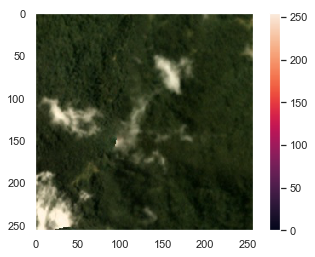

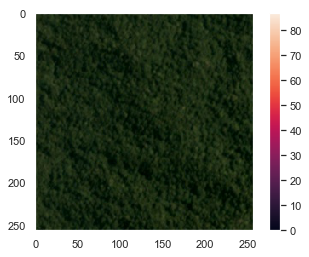

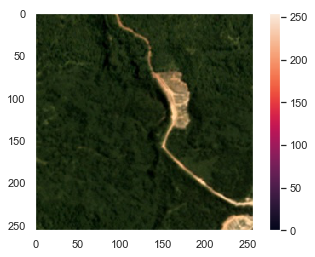

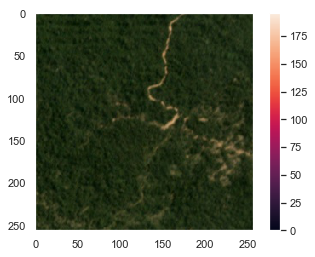

In [100]:
for image in nopalm_images:
    img  = Image.open(image)
    plt.imshow(img)
    plt.colorbar()
    plt.grid()== False
    plt.show()

## OBSERVATION:
- There are about 15 244 images with an equal number of score and max of 1 signifies that there is an oil palm while a 0 means no oil palm.

- There are non Null of NaN columns since the number of 'counts' in the data.describe are equivalent

- This dataset is very biase. 93 percent of the images(which corresponds to 14 302 images) does not have oilpalms while only 6 percent has oilpalms( approx. 942 images). Same with the scores, 83 percent of all scores are 1 while the remaining scores are about 16 percent.

- We can also see that the images with oil palms on them have some kind of stratifications on them while does with no oilpalms do not have these divisions.


In [101]:
new_label = label_0[0:942]
new_label.head()

,image_id,has_oilpalm,score,image_path
0,img_000002017.jpg,0,0.7895,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
1,img_000012017.jpg,0,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
2,img_000022017.jpg,0,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
3,img_000072017.jpg,0,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
4,img_000082017.jpg,0,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...


In [102]:
new_label.shape

(942, 4)

In [103]:
new_data = pd.concat([new_label, label_1], ignore_index=True)
new_data.shape

(1884, 4)

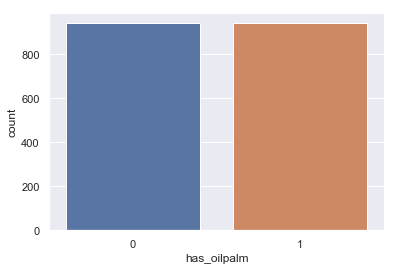

In [104]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'has_oilpalm', data = new_data)

In [105]:
#splitting hte data

from sklearn.model_selection import train_test_split

features = [x for x in new_data.columns if x!= 'has_oilpalm']
X_new = new_data[features]
y_new = new_data['has_oilpalm']




X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, stratify = y_new,
                                                    test_size=0.25)
print(X_new.shape)

(1884, 3)


In [106]:
X_train.shape

(1413, 3)

In [107]:
y_train.shape

(1413,)

In [108]:
X_val.shape

(471, 3)

In [109]:
y_val.shape

(471,)

In [110]:
y_val.value_counts(normalize = True)

0    0.501062
1    0.498938
Name: has_oilpalm, dtype: float64

In [111]:
# append the label1 data to raise the ratio
copy_num = round((14000-942)/942)-1
copy_num

13

In [112]:
# balanced_data = data
# for i in range(copy_num):
#     balanced_data = balanced_data.append(label_1)

In [113]:
#ax = sns.countplot(x = 'has_oilpalm', data = balanced_data)

In [114]:
#splitting the data into train and trest

import shutil
import os
def copyFile(src, dest):
    """
    copy file with error handler
    """
    try:
        shutil.copy(src,dest)
    except shutil.Error as e:
        print("Error: " + str(e))
    except IOError as e:
        print("Error: " + e.strerror)

def generate_dir(path, dir_name, df):
    """
    path (string): string contain the original path to images
    dir_name (string): string contain the name of the folder to create
    df (dataframe): dataframe containing the image_id to copy to the created folder
    """

    # define the name of the directory to be created
    folder_path = os.path.join(path,dir_name)
    try:  
        os.mkdir(folder_path)
    except OSError:  
        print ("Creation of the directory %s failed" % folder_path)
    else:  
        print ("Successfully created the directory %s " % folder_path)
        
    # Copy all the selected picture to the train folder
    for img_id in df['image_id']:
        # Declare src and dest   
        src = os.path.join(path,img_id)
        dest = os.path.join(folder_path,img_id)
        copyFile(src,dest)


In [115]:

generate_dir(img_train_path,'train_small',X_train)
generate_dir(img_train_path,'validate_small',X_val)


Creation of the directory C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train\train_small failed
Creation of the directory C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train\validate_small failed


In [116]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
%matplotlib inline 

In [ ]:
# # RESNET
# NUM_CLASSES = 2

# model = Sequential()
# model.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
# model.add(Dense(NUM_CLASSES, activation='softmax'))
# #model.add(Dropout(0.25))
# # ResNet-50 model is already trained, should not be trained
# model.layers[0].trainable = False

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(80, 80, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), 
              metrics=['accuracy'])

In [118]:
# Creating a f1 score metric

# Creating a f1 score metric

#https://stackoverflow.com/questions/43345909/when-using-mectrics-in-model-compile-in-keras-report-valueerror-unknown-metr/43354147#43354147
import keras.backend as K
def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [119]:
from keras.optimizers import SGD, Adam
#sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy', f1_score])

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [121]:
# #I needed to do this part for the fow from dataframe

new_data['has_oilpalm'][new_data["has_oilpalm"] == 0] = "no_palm"
new_data['has_oilpalm'][new_data["has_oilpalm"] == 1] = "has_palm"
new_data.sample(10)


C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,image_id,has_oilpalm,score,image_path
182,img_002882017.jpg,no_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
1468,img_013052018.jpg,has_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
852,img_013242017.jpg,no_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
493,img_007892017.jpg,no_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
968,img_006222017.jpg,has_palm,0.7976,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
1593,img_042682018.jpg,has_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
1136,img_045812017.jpg,has_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
1855,img_105002018.jpg,has_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
1775,img_085592018.jpg,has_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
342,img_005472017.jpg,no_palm,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...


In [122]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

print('In the Training Set:\n ')
train_set = train_generator.flow_from_dataframe(dataframe = new_data, 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train\train_small',
    x_col = "image_id",
    y_col = "has_oilpalm",                                           
    target_size = (64, 64),
    batch_size = 50,
    class_mode = 'categorical',
    shuffle=False,      # Set as training data
    seed = 42
)

In the Training Set:
 
Found 1877 images belonging to 2 classes.


In [123]:
print('In the Validation Set: ')
valid_generator = ImageDataGenerator(rescale = 1./255)

valid_set = valid_generator.flow_from_dataframe(dataframe = new_data, 
    directory= r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train\validate_small",
    x_col = "image_id",
    y_col = "has_oilpalm",                                           
    target_size = (64, 64),
    batch_size = 50,
    class_mode = 'categorical',
    shuffle=False,     # Set as validation data
    seed = 42
)

#test set
print("\nIn the Test Set:")
test_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data',
#     x_col = 'filename',
#     y_col = None,
    target_size = (64, 64),
    batch_size = 100,
    class_mode = None,
    shuffle=False,
    seed = 42
)



In the Validation Set: 
Found 1277 images belonging to 2 classes.

In the Test Set:
Found 6534 images belonging to 1 classes.


In [124]:
STEP_SIZE_TRAIN=train_set.n//train_set.batch_size

STEP_SIZE_VALID=valid_set.n//valid_set.batch_size

train_model = model.fit_generator(train_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs = 20,
                    validation_data = valid_set,
                    validation_steps=STEP_SIZE_VALID)

Epoch 1/20
37/37 [==============================] - 73s 2s/step - loss: 4.5870 - acc: 0.5125 - f1_score: nan - val_loss: 4.5045 - val_acc: 0.4896 - val_f1_score: nan
Epoch 2/20
37/37 [==============================] - 66s 2s/step - loss: 4.5133 - acc: 0.4964 - f1_score: nan - val_loss: 8.2267 - val_acc: 0.4896 - val_f1_score: nan
Epoch 3/20
37/37 [==============================] - 65s 2s/step - loss: 4.4185 - acc: 0.4960 - f1_score: nan - val_loss: 8.2267 - val_acc: 0.4896 - val_f1_score: nan
Epoch 4/20
37/37 [==============================] - 67s 2s/step - loss: 4.2690 - acc: 0.5188 - f1_score: 0.5188 - val_loss: 8.2267 - val_acc: 0.4896 - val_f1_score: nan
Epoch 5/20
37/37 [==============================] - 72s 2s/step - loss: 3.6221 - acc: 0.5610 - f1_score: 0.5610 - val_loss: 8.2267 - val_acc: 0.4896 - val_f1_score: nan
Epoch 6/20
37/37 [==============================] - 72s 2s/step - loss: 3.5460 - acc: 0.5676 - f1_score: 0.5676 - val_loss: 4.0747 - val_acc: 0.4896 - val_f1_score:

In [125]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()


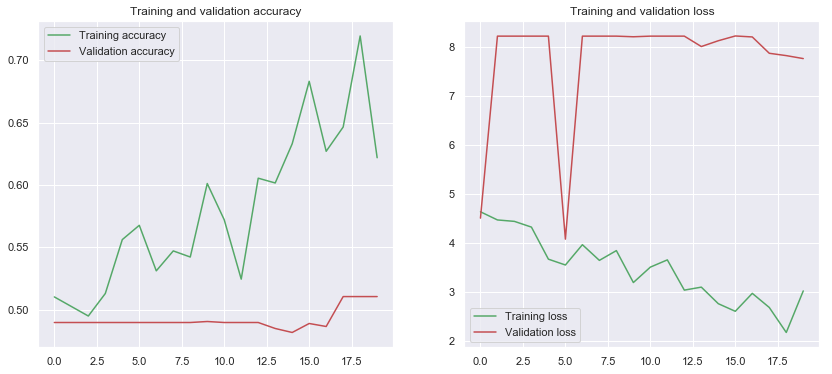

In [126]:
plot_accuracy_and_loss(train_model)

In [127]:
STEP_SIZE_TEST=test_set.n//test_set.batch_size

prediction = model.predict_generator(test_set, steps = test_set.n , verbose=1)


6534/6534 [==============================] - 8306s 1s/step


In [ ]:
my_prediction = model.predict_classes(test_set)

# Submissin File

In [129]:
test_filenames = os.listdir(r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set")
WIDS_solution = pd.DataFrame({'image_id': test_filenames, "has_oilpalm" : my_prediction })

#creating csv file

WIDS_solution.to_csv("WIDS2019_short.csv", index = False)
WIDS_solution.sample(10)

,image_id,has_oilpalm
5543,img_093712018.jpg,1
5220,img_088202018.jpg,1
3729,img_064092017.jpg,1
5701,img_096312017.jpg,1
3898,img_066732018.jpg,1
2017,img_034542018.jpg,1
3308,img_057022017.jpg,1
244,img_003812017.jpg,1
6343,img_108082017.jpg,1
852,img_014302018.jpg,1


Referencec:
- https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
- https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
- https://www.tensorflow.org/tutorials/keras/basic_classification
- https://www.kaggle.com/jhonatansilva31415/whales-a-simple-guide
- https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751
- https://www.kaggle.com/gpreda/cats-or-dogs-using-cnn-with-transfer-learning
- https://medium.com/neuralspace/kaggle-1-winning-approach-for-image-classification-challenge-9c1188157a86
- https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2
- https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6

****************************************************************************************************************************